In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

##  Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns 
np.random.seed(42)

## Loading The Dataset

In [2]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# df = df.drop(columns = ['sepal_length'])
# df.head()

In [5]:
#  To display data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#  To display statistics of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# To display no of samples on each class

df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Preprocessing The Dataset

In [8]:
# Displays number of null values for each column
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory Data Analysis

In [9]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

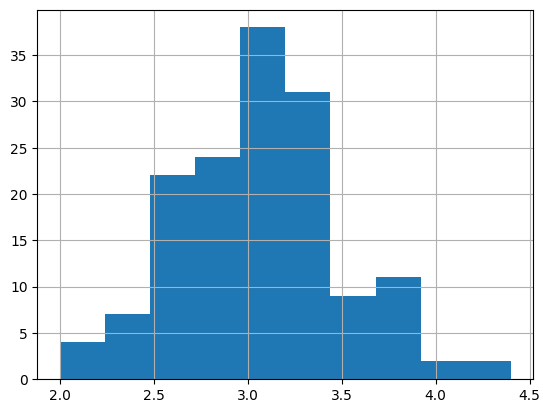

In [11]:
df['sepal_width'].hist()

<Axes: >

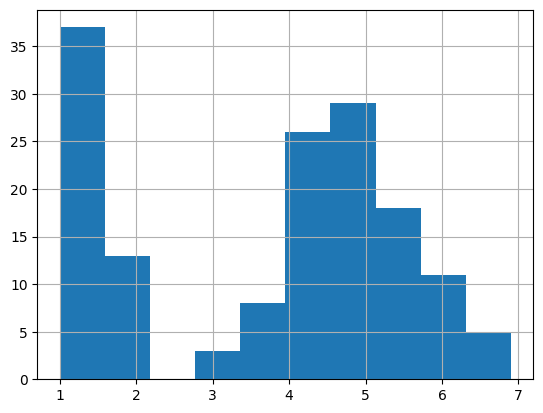

In [12]:
df['petal_length'].hist()

<Axes: >

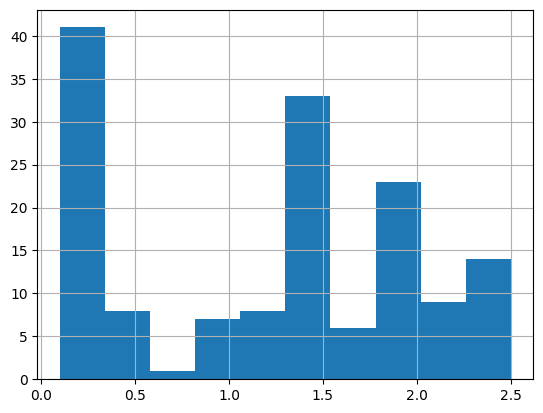

In [13]:
df['petal_width'].hist()

<Axes: >

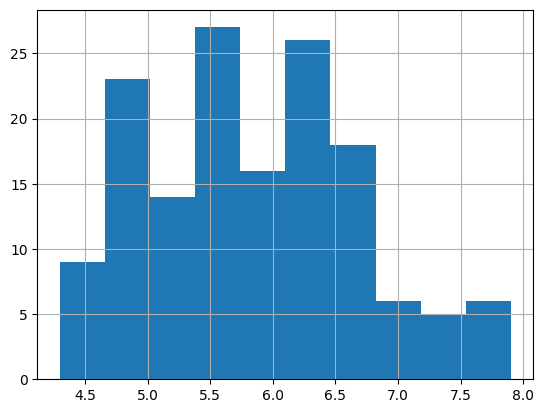

In [14]:
df['sepal_length'].hist()

In [15]:
# Scatter Plots
color = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

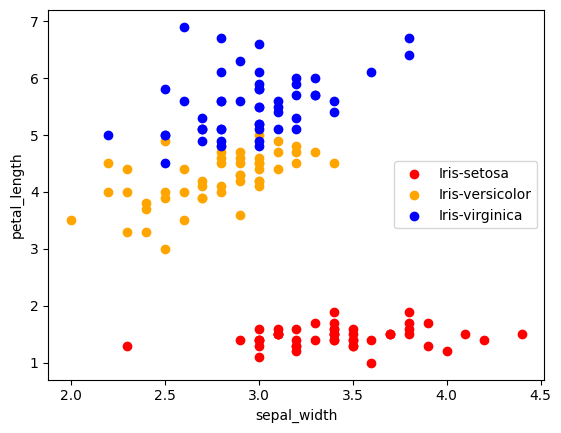

In [16]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_length'], c = color[i], label = species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.legend()

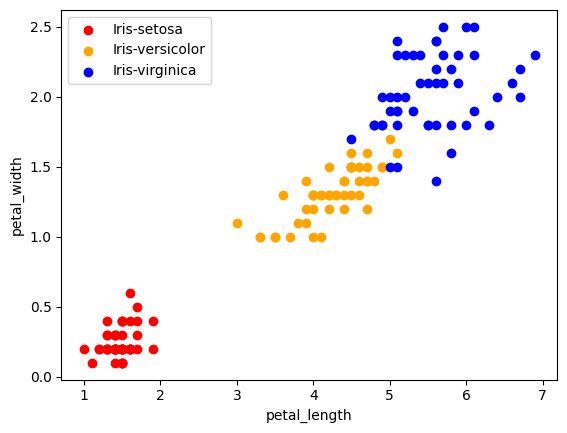

In [17]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = color[i], label = species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

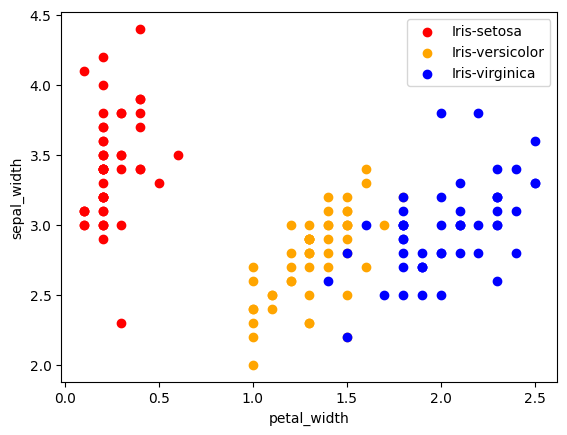

In [18]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_width'], x['sepal_width'], c = color[i], label = species[i])
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.legend()

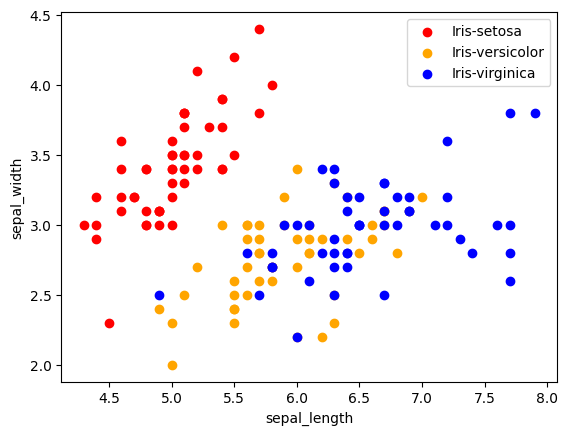

In [19]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = color[i], label = species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

## Correlation Matrix

In [22]:
df.drop(columns = ['species']).corr()
# Works only on numeric data, df.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

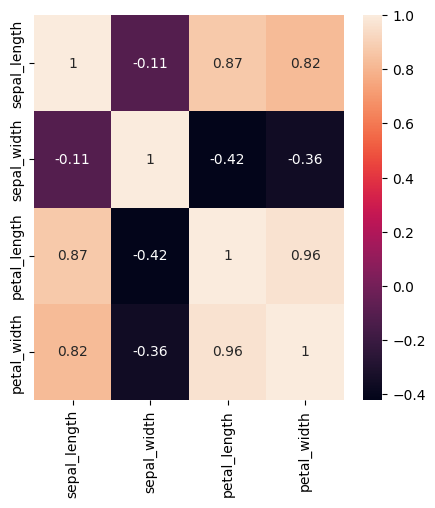

In [23]:
corr = df.drop(columns = ['species']).corr()
fig, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(corr, annot = True, ax = ax)

In [24]:
# corr = df.drop(columns = ['species', 'sepal_length', 'sepal_width']).corr()
# fig, ax = plt.subplots(figsize = (5, 5))
# sns.heatmap(corr, annot = True, ax = ax)

## Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df['species'] = le.fit_transform(df['species'])

In [27]:
df['species'].dtype

dtype('int64')

## Model Training

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['species'])
Y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [29]:
# x_train, x_test, y_train, y_test

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [59]:
model.fit(X_train, y_train)

LogisticRegression()

In [60]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  100.0


In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [34]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  100.0


In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [37]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  100.0


In [38]:
# I deleted the column attributes but it increased the correlation between the other attributes  -> Removing correlated features does NOT guarantee lower correlation among what remains. can show their hidden features to correlate
# can the sepal width be deleted
# can we fix the train test split seed?
# Read about these three classifiers

In [39]:
# One vs All
# Binary Classification
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
df['species'].unique()

array([0, 1, 2])

In [41]:
# df0 = df.copy()
# df0['y'] = df0[df0['species'] == 0, 1, -1]
# df1 = df.copy()
# df1['y'] = df1[df1['species'] == 1, 1, -1]
# df2 = df.copy()
# df2['y'] = df2[df2['species'] == 2, 1, -1]

In [42]:
y_0_train = np.where(y_train == 0, 1, 0)
y_1_train = np.where(y_train == 1, 1, 0)
y_2_train = np.where(y_train == 2, 1, 0)
y_0_test = np.where(y_test == 0, 1, 0)
y_1_test = np.where(y_test == 1, 1, 0)
y_2_test = np.where(y_test == 2, 1, 0)


In [43]:
# from sklearn.linear_model import LinearRegression
# model_0 = LinearRegression()
# model_1 = LinearRegression()
# model_2 = LinearRegression()

In [44]:
class BuildLinearRegression:
    def __init__(self, lr = 0.01, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 100

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.7

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b

            dw = (2 / n_samples) * X.T @ (y_pred - y)
            db = (2 / n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b


In [45]:
# from sklearn.linear_model import LogisticRegression
# model_0 = LogisticRegression()
# model_1 = LogisticRegression()
# model_2 = LogisticRegression()

In [61]:
class BuildLogisticRegression:
    def __init__(self, lr = 0.01, epochs = 2000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        X: (n_samples, n_features)
        y: binary labels (0/1 or -1/1)
        """
        n_samples, n_features = X.shape

        # Convert -1/+1 labels to 0/1 if needed
        y = np.where(y == -1, 0, y)

        self.w = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.epochs):
            linear_output = X @ self.w + self.b
            y_pred = self._sigmoid(linear_output)

            # Gradients
            dw = (1 / n_samples) * X.T @ (y_pred - y)
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        """
        Returns probabilities
        """
        linear_output = X @ self.w + self.b
        return self._sigmoid(linear_output)

    def predict_class(self, X, threshold=0.5):
        """
        Returns class labels (0 or 1)
        """
        probs = self.predict(X)
        return (probs >= threshold).astype(int)


In [62]:
X.shape

(150, 4)

In [63]:
model_0 = BuildLogisticRegression()
model_1 = BuildLogisticRegression()
model_2 = BuildLogisticRegression()

In [ ]:
model_0 = BuildLinearRegression()
model_1 = BuildLinearRegression()
model_2 = BuildLinearRegression()

In [64]:
model_0.fit(X_train, y_0_train)
model_1.fit(X_train, y_1_train)
model_2.fit(X_train, y_2_train)


In [65]:
scores_0 = model_0.predict_class(X_test)
scores_1 = model_1.predict_class(X_test)
scores_2 = model_2.predict_class(X_test)


In [66]:
# y_0_pred = np.where(scores_0 >= 0, 1, -1)
# y_1_pred = np.where(scores_1 >= 0, 1, -1)
# y_2_pred = np.where(scores_2 >= 0, 1, -1)


In [67]:
np.mean(scores_0 == y_0_test) * 100

np.float64(100.0)

In [68]:
np.mean(scores_1 == y_1_test) * 100

np.float64(68.88888888888889)

In [69]:
np.mean(scores_2 == y_2_test) * 100

np.float64(100.0)

In [70]:
scores = np.vstack([scores_0, scores_1, scores_2]).T
y_pred = np.argmax(scores, axis=1)


In [71]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0])

In [73]:
np.mean(y_pred == y_test)*100

np.float64(68.88888888888889)